In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      # zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [3]:
train_dir = '../dataset/train/'
val_dir = '../dataset/valid/'

In [4]:
train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='sparse',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='sparse',
  batch_size=32
)

Found 15318 images belonging to 3 classes.
Found 1276 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dropout(0.4),

    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

In [5]:
model = tf.keras.models.load_model('../model/local_run_15_epoch_reduce_datagen_add_5_epoch/')

In [6]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 256)      

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    # steps_per_epoch=100,
    # validation_steps=48,
    validation_data = validation_generator,
    verbose = 1)

Epoch 1/5
479/479 [==============================] - 107s 210ms/step - loss: 0.1295 - accuracy: 0.9521 - val_loss: 0.1244 - val_accuracy: 0.9608
Epoch 2/5
479/479 [==============================] - 160s 335ms/step - loss: 0.1106 - accuracy: 0.9608 - val_loss: 0.1800 - val_accuracy: 0.9310
Epoch 3/5
479/479 [==============================] - 137s 285ms/step - loss: 0.1104 - accuracy: 0.9574 - val_loss: 0.1045 - val_accuracy: 0.9694
Epoch 4/5
479/479 [==============================] - 100s 209ms/step - loss: 0.1002 - accuracy: 0.9625 - val_loss: 0.1090 - val_accuracy: 0.9702
Epoch 5/5
479/479 [==============================] - 147s 307ms/step - loss: 0.0868 - accuracy: 0.9691 - val_loss: 0.1171 - val_accuracy: 0.9663


In [11]:
print(tf.__version__)
model.save('../model/local_run_15_epoch_reduce_datagen_add_5_epoch_2/')

2.5.0
INFO:tensorflow:Assets written to: ../model/local_run_15_epoch_reduce_datagen_add_5_epoch_2/assets


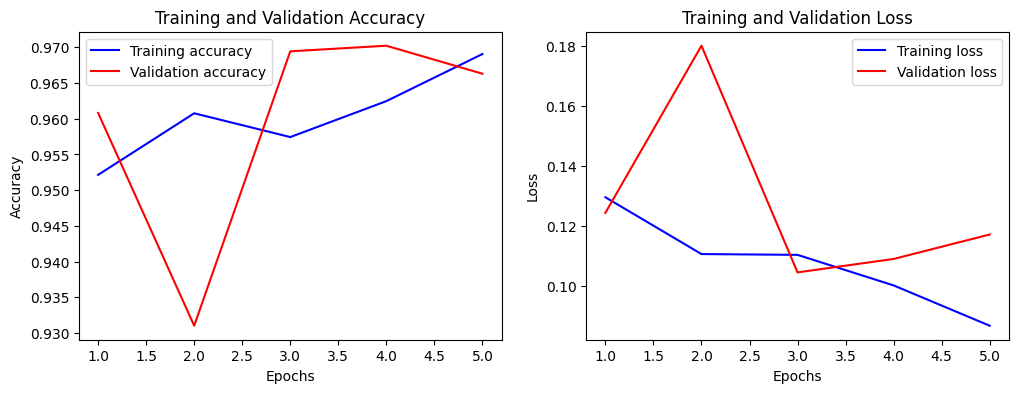

In [12]:
# import matplotlib.pyplot as plt

def plot_metrics(history):
    # Ambil data akurasi, loss, val_accuracy, dan val_loss dari objek history
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Tentukan jumlah epoch berdasarkan panjang history
    epochs = range(1, len(acc) + 1)

    # Plot Akurasi
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

In [194]:
pip install tensorflowjs==3.18.0


     ---------------------------------------- 0.0/77.5 kB ? eta -:--:--
     --------------------- ------------------ 41.0/77.5 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 77.5/77.5 kB 1.1 MB/s eta 0:00:00
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.25.1 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
matplotlib 3.7.4 requires numpy<2,>=1.20, but you have numpy 1.19.2 which is incompatible.
supervision 0.17.1 requires numpy>=1.21.2, but you have numpy 1.19.2 which is incompatible.


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import random

# Load your saved model
# model_path = 'path/to/your/saved_model'
loaded_model =  model #tf.keras.models.load_model(model_path)

# Specify the directory containing your test images
# test_directory = './dataset/valid/Heart'
# test_directory = './dataset/valid/Round'
# test_directory = './dataset/valid/Square/'
test_directory = '../img/'

# Get a list of image files in the test directory
image_files = [f for f in os.listdir(test_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 samples
random_10_samples = random.sample(image_files, 10)

# Class labels corresponding to Heart, Round, Square
class_labels = ['Heart', 'Round', 'Square']

# Iterate over the 10 randomly selected image files and make predictions
for img_file in random_10_samples:
    img_path = os.path.join(test_directory, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index (0, 1, or 2)
    predicted_class_index = np.argmax(predictions)

    # Get the corresponding class label
    predicted_class_label = class_labels[predicted_class_index]

    # Print the prediction result
    print(f"\nPredicted face shape for {img_file}: {predicted_class_label}")



Predicted face shape for Screenshot 2023-12-21 014132.png: Square

Predicted face shape for squaree.jpg: Square

Predicted face shape for adudu.jpg: Round

Predicted face shape for Screenshot 2023-12-21 013723.png: Round

Predicted face shape for Screenshot 2023-12-21 013954.png: Round

Predicted face shape for Screenshot 2023-12-21 013913.png: Round

Predicted face shape for Screenshot 2023-12-21 014433.png: Round

Predicted face shape for kotak.png: Round

Predicted face shape for Screenshot 2023-12-21 013553.png: Round

Predicted face shape for test1.jpeg: Heart


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import random

# Load your saved model
# model_path = 'path/to/your/saved_model'
loaded_model =  model #tf.keras.models.load_model(model_path)

# Specify the directory containing your test images
# test_directory = './dataset/valid/Heart'
# test_directory = './dataset/valid/Round'
# test_directory = './dataset/valid/Square/'
test_directory = '../img/'

# Get a list of image files in the test directory
image_files = [f for f in os.listdir(test_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 samples
random_10_samples = random.sample(image_files, 10)

# Class labels corresponding to Heart, Round, Square
class_labels = ['Heart', 'Round', 'Square']

# Iterate over the 10 randomly selected image files and make predictions
for img_file in random_10_samples:
    img_path = os.path.join(test_directory, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index (0, 1, or 2)
    predicted_class_index = np.argmax(predictions)

    # Get the corresponding class label
    predicted_class_label = class_labels[predicted_class_index]

    # Get the percentage of prediction for each class
    percentage_predictions = [round(p * 100, 2) for p in predictions[0]]

    # Print the prediction result with percentages
    print(f"\nPredicted face shape for {img_file}: {predicted_class_label}")
    for label, percentage in zip(class_labels, percentage_predictions):
        print(f"{label}: {percentage}%")



Predicted face shape for Screenshot 2023-12-21 013913.png: Round
Heart: 0.0%
Round: 99.54%
Square: 0.46%

Predicted face shape for Screenshot 2023-12-21 013723.png: Round
Heart: 3.99%
Round: 96.0%
Square: 0.01%

Predicted face shape for 22390-shin-min-ah.jpg: Round
Heart: 0.05%
Round: 99.94%
Square: 0.01%

Predicted face shape for test1.jpeg: Heart
Heart: 67.25%
Round: 0.08%
Square: 32.66%

Predicted face shape for Screenshot 2023-12-21 013835.png: Round
Heart: 0.0%
Round: 96.84%
Square: 3.16%

Predicted face shape for test2.jpg: Square
Heart: 0.01%
Round: 0.18%
Square: 99.82%

Predicted face shape for Screenshot 2023-12-21 013553.png: Round
Heart: 0.0%
Round: 100.0%
Square: 0.0%

Predicted face shape for round.png: Round
Heart: 0.0%
Round: 99.94%
Square: 0.06%

Predicted face shape for Screenshot 2023-12-21 014307.png: Round
Heart: 0.09%
Round: 99.71%
Square: 0.21%

Predicted face shape for Screenshot 2023-12-21 014523.png: Round
Heart: 5.62%
Round: 94.33%
Square: 0.06%


In [18]:
import tensorflowjs

In [19]:
import time
saved_model_path = "../tfjs_model/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [21]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ../tfjs_model/

2023-12-21 16:28:25.516778: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
